[ 2.0380943e-05  2.4491907e-05 -1.0169737e-05 ... -3.2216359e-02
 -3.2649983e-02 -3.2728888e-02]
[[ 2.0380943e-05  0.0000000e+00]
 [ 2.4491907e-05  0.0000000e+00]
 [-1.0169737e-05  0.0000000e+00]
 ...
 [-3.2216359e-02  0.0000000e+00]
 [-3.2649983e-02  0.0000000e+00]
 [-3.2728888e-02  0.0000000e+00]]
48000.0


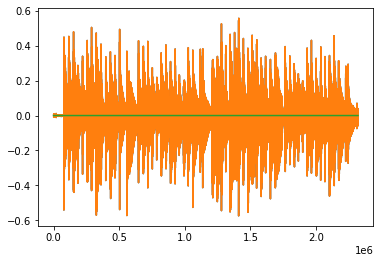

In [14]:
import array
import numpy as np
import scipy
from pydub.utils import get_array_type
from scipy.fft import fft
import sys
#sys.path.append("/usr/local/lib/python3.7/site-packages")
sys.path.append("/usr/local/lib/python3.8/site-packages")
import essentia
# import essentia.standard as es
from essentia.standard import *
from pydub import AudioSegment

from pylab import plot, show, figure, imshow


file_name = "/Users/linyaya/Desktop/ode1.m4a"
song = AudioSegment.from_file(file_name)
print(song[0])
audio = MonoLoader(filename=file_name, sampleRate=48000)()
print(audio)
plot(audio)

audio = AudioLoader(filename = file_name)()
print(audio[0])
print(audio[1])
# print(samplerate)
plot(audio[0])



Duration of the audio sample [sec]:
48.34


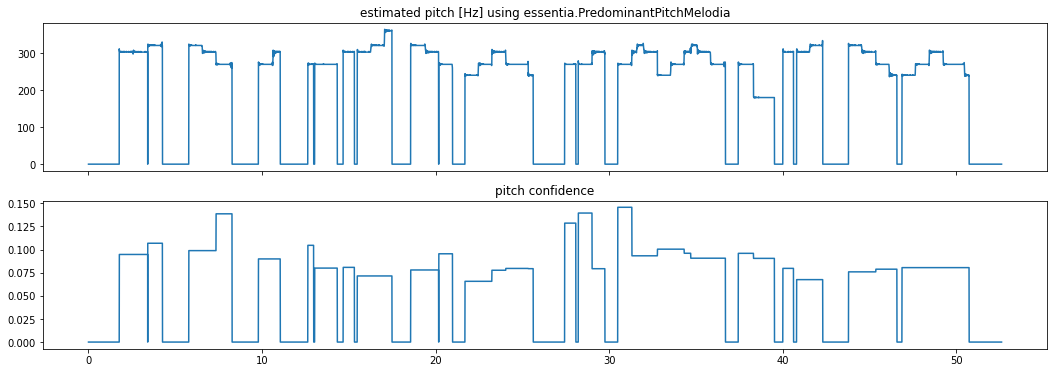

In [17]:
import numpy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6) 
# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia
loader = EqloudLoader(filename=file_name, sampleRate=48000)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/48000.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz] using essentia.PredominantPitchMelodia')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()